In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
stroke.drop('id', axis=1, inplace=True)

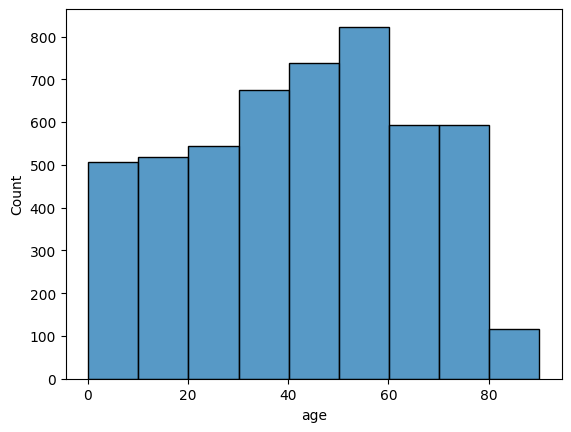

In [5]:
sns.histplot(stroke['age'], binwidth=10)
plt.show()

In [6]:
stroke_adult = stroke[stroke['age'] >= 18]
stroke_adult.dropna(inplace=True)

In [7]:
stroke_adult.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4073,4073.000000,4073.000000,4073.000000,4073,4073,4073,4073.000000,4073.000000,4073,4073.000000
unique,3,NaN,NaN,NaN,2,4,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2488,NaN,NaN,NaN,3204,2681,2074,NaN,NaN,1714,NaN
mean,NaN,49.901056,0.110484,0.059416,NaN,NaN,NaN,107.610449,30.432752,NaN,0.051068
std,NaN,17.790731,0.313530,0.236430,NaN,NaN,NaN,46.943005,7.235143,NaN,0.220164
min,NaN,18.000000,0.000000,0.000000,NaN,NaN,NaN,55.120000,11.300000,NaN,0.000000
25%,NaN,36.000000,0.000000,0.000000,NaN,NaN,NaN,77.260000,25.400000,NaN,0.000000
50%,NaN,50.000000,0.000000,0.000000,NaN,NaN,NaN,92.210000,29.200000,NaN,0.000000
75%,NaN,63.000000,0.000000,0.000000,NaN,NaN,NaN,115.420000,34.200000,NaN,0.000000


In [8]:
stroke_adult = stroke_adult.loc[stroke_adult['gender'] != 'Other', :]
stroke_adult['gender'] = stroke_adult['gender'].replace({'Male':0,'Female':1}).astype('uint8')
stroke_adult['Residence_type'] = stroke_adult['Residence_type'].replace({'Rural':0,'Urban':1}).astype('uint8')
stroke_adult['ever_married'] = stroke_adult['ever_married'].replace({'No':0,'Yes':1}).astype('uint8')
stroke_adult['hypertension'] = stroke_adult['hypertension'].astype('uint8')
stroke_adult['heart_disease'] = stroke_adult['heart_disease'].astype('uint8')
stroke_adult['stroke'] = stroke_adult['stroke'].astype('uint8')

In [9]:
stroke_adult = pd.get_dummies(stroke_adult, columns=['smoking_status', 'work_type'])
stroke_adult.drop('smoking_status_Unknown', axis=1, inplace=True)
stroke_adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4072 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          4072 non-null   uint8  
 1   age                             4072 non-null   float64
 2   hypertension                    4072 non-null   uint8  
 3   heart_disease                   4072 non-null   uint8  
 4   ever_married                    4072 non-null   uint8  
 5   Residence_type                  4072 non-null   uint8  
 6   avg_glucose_level               4072 non-null   float64
 7   bmi                             4072 non-null   float64
 8   stroke                          4072 non-null   uint8  
 9   smoking_status_formerly smoked  4072 non-null   uint8  
 10  smoking_status_never smoked     4072 non-null   uint8  
 11  smoking_status_smokes           4072 non-null   uint8  
 12  work_type_Govt_job              40

In [10]:
from imblearn.over_sampling import SMOTE

X = stroke_adult.drop(columns = ['stroke'])
y = stroke_adult['stroke']
smote = SMOTE(random_state=187)
X_os, y_os = smote.fit_resample(X, y)
X_os.shape, y_os.shape

((7728, 15), (7728,))

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_os[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(X_os[['age', 'avg_glucose_level', 'bmi']])

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold

classifiers = {'LogisticRegression': LogisticRegression(random_state=187, max_iter=1000), 
               'GaussianNB': GaussianNB(), 
               'RandomForestClassifier': RandomForestClassifier(random_state=187), 
               'SVC': SVC(random_state=187)}

kf = KFold(shuffle=True, random_state=187)
for model, model_inst in classifiers.items():
  cv_res = cross_val_score(model_inst, X_os, y_os, cv=kf, scoring='f1')
  print(f'Model: {model}, avarage f1 = {cv_res.mean():.4f}')

Model: LogisticRegression, avarage f1 = 0.8689
Model: GaussianNB, avarage f1 = 0.7317
Model: RandomForestClassifier, avarage f1 = 0.9563
Model: SVC, avarage f1 = 0.9128


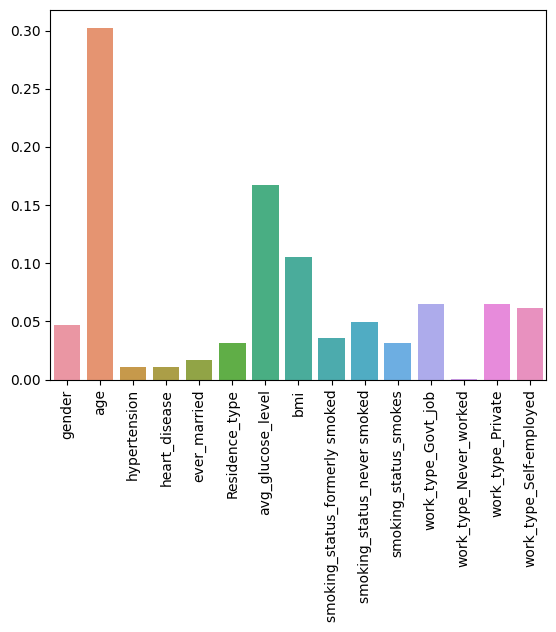

In [13]:
rfc = RandomForestClassifier(random_state=187)
rfc.fit(X_os, y_os)
sns.barplot(x=X_os.columns, y=rfc.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score

X.drop('work_type_Never_worked', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 187, stratify=y)

scaler = StandardScaler()
X_train[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(X_train[['age', 'avg_glucose_level', 'bmi']])
X_test[['age', 'avg_glucose_level', 'bmi']] = scaler.transform(X_test[['age', 'avg_glucose_level', 'bmi']])

oversample = SMOTE()
X_train_os, y_train_os = oversample.fit_resample(X_train, y_train)

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

tuned_params = {'n_estimators': [64,100,128,200],
                'criterion': ['gini', 'entropy'],
                'max_features': [2,3,5,7], 
                'bootstrap': [True,False]}

rfgrid = GridSearchCV(estimator=RandomForestClassifier(random_state=187),
                      param_grid=tuned_params,
                      scoring='recall',
                      cv=3,
                      verbose=3,
                      n_jobs = -1)

rfgrid.fit(X_train_os, y_train_os)
y_test_pred = rfgrid.predict(X_test)
print(classification_report(y_test, y_test_pred))

Fitting 3 folds for each of 64 candidates, totalling 192 fits
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1160
           1       0.05      0.06      0.05        62

    accuracy                           0.89      1222
   macro avg       0.50      0.50      0.50      1222
weighted avg       0.90      0.89      0.90      1222



In [16]:
tuned_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

logrid = GridSearchCV(estimator=LogisticRegression(random_state=187),
                      param_grid=tuned_params,
                      scoring='recall',
                      cv=3,
                      verbose=3,
                      n_jobs = -1)

logrid.fit(X_train_os, y_train_os)
y_test_pred = logrid.predict(X_test)
print(classification_report(y_test, y_test_pred))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1160
           1       0.12      0.66      0.21        62

    accuracy                           0.74      1222
   macro avg       0.55      0.70      0.53      1222
weighted avg       0.93      0.74      0.81      1222



In [17]:
tuned_params = {'C': [0.1, 1, 10, 100, 1000],  
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
                'kernel': ['rbf']}

svcgrid = GridSearchCV(estimator=SVC(random_state=187),
                      param_grid=tuned_params,
                      scoring='recall',
                      cv=3,
                      verbose=3,
                      n_jobs = -1)

svcgrid.fit(X_train_os, y_train_os)
y_test_pred = svcgrid.predict(X_test)
print(classification_report(y_test, y_test_pred))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1160
           1       0.05      0.10      0.07        62

    accuracy                           0.87      1222
   macro avg       0.50      0.50      0.50      1222
weighted avg       0.90      0.87      0.89      1222



In [18]:
tuned_params = {'var_smoothing': np.logspace(0,-9, num=100)}

nbgrid = GridSearchCV(estimator=GaussianNB(),
                      param_grid=tuned_params,
                      scoring='recall',
                      cv=3,
                      verbose=3,
                      n_jobs = -1)

nbgrid.fit(X_train_os, y_train_os)
y_test_pred = nbgrid.predict(X_test)
print(classification_report(y_test, y_test_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
              precision    recall  f1-score   support

           0       0.98      0.67      0.79      1160
           1       0.11      0.77      0.19        62

    accuracy                           0.67      1222
   macro avg       0.55      0.72      0.49      1222
weighted avg       0.94      0.67      0.76      1222



In [19]:
print("Best parameters set found on train set:")
print(logrid.best_params_)
print(logrid.best_estimator_)
print('Score on Test Data: ', logrid.score(X_test, y_test))

Best parameters set found on train set:
{'C': 0.1}
LogisticRegression(C=0.1, random_state=187)
Score on Test Data:  0.6612903225806451


In [20]:
logreg = logrid.best_estimator_
logreg.fit(X_train_os, y_train_os)
y_test_pred = logreg.predict(X_test)
print('Accuracy Score on Test Data: ', accuracy_score(y_test, y_test_pred))
print('Recall Score on Test Data: ', recall_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

Accuracy Score on Test Data:  0.7414075286415712
Recall Score on Test Data:  0.6612903225806451


array([[865, 295],
       [ 21,  41]])

In [21]:
print("Best parameters set found on train set:")
print(nbgrid.best_params_)
print(nbgrid.best_estimator_)

Best parameters set found on train set:
{'var_smoothing': 0.533669923120631}
GaussianNB(var_smoothing=0.533669923120631)


In [22]:
gnb = nbgrid.best_estimator_
gnb.fit(X_train_os, y_train_os)
y_test_pred = gnb.predict(X_test)
print('Accuracy Score on Test Data: ', accuracy_score(y_test, y_test_pred))
print('Recall Score on Test Data: ', recall_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

Accuracy Score on Test Data:  0.6726677577741408
Recall Score on Test Data:  0.7741935483870968


array([[774, 386],
       [ 14,  48]])

In [23]:
from pickle import dump

dump(scaler, open('model/standard_scaler.pkl', 'wb'))
dump(logreg, open('model/logreg_model.pkl', 'wb'))